In [111]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

In [112]:
sgm = sym.Symbol('sigma',real=True)
X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_porcentual(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    es = e/d
    if e <= (2.5*d):
        return sym.Matrix([round(e,1)*sgm,True])
    else:
        return sym.Matrix([round(e,1)*sgm,False])

# Movimiento armónico simple y oscilador amortiguado

In [113]:
g = 9.76871 #m/s^2

def w_0(m,l,I,g=9.76871):
    return np.sqrt((m*g*l)/I)

def T_0(w0):
    return (2*np.pi)/w0

def gamma(b,l,I):
    return (b*(l**2))/I

def I_esfera(m,r,l):
    return (((5/2)*m*(r**2)) + (m(l**2)))

def omega_prima(w0,gamma):
    return np.sqrt((w0**2) - ((gamma**2)/4))

def T_prima(wp):
    return (2*np.pi)/wp

def graficar_MAS(A,w0,phi=0):
    t = 3*(T_0(w0))
    t = np.linspace(0,t,61)
    x = A*np.cos(w0*t + phi)
    plt.plot(t,x)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.show()
    fig = plt.gcf()
    return fig

def graficar_amortiguado(A0,gamma,w_prima,phi=0):
    t = 3*(T_prima(w_prima))
    t = np.linspace(0,t,61)
    x = A0*np.exp((-gamma/2)*t)*np.cos(w_prima*t + phi)
    plt.plot(t,x)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.show()
    fig = plt.gcf()
    return fig

# Datos

In [114]:
l = np.array([1.5, 1.35, 1.2, 1.05, 0.9, 0.75]) #m

#Cobre
m_cobre = 0.05 #Kg
T_ = np.array([2.47, 2.36, 2.21, 2.04, 1.91, 1.74]) #s

#Icopor
m_icopor = 0.0414 #Kg
gamma_ = np.array([0.012, 0.013, 0.01, 0.009, 0.01, 0.01]) #?
w = np.array([2.478, 2.611, 2.774, 2.971, 3.172, 3.467]) #rad/s

In [115]:
T_

array([2.47, 2.36, 2.21, 2.04, 1.91, 1.74])

# Análisis

In [116]:
T_teo = 2*np.pi*(np.sqrt(l/g))
np.round(T_teo,2)

array([2.46, 2.34, 2.2 , 2.06, 1.91, 1.74])

In [117]:
np.abs(T_teo-T_)

array([0.00789319, 0.02424039, 0.00782472, 0.01994635, 0.00286027,
       0.00097242])

In [118]:
w0 = (2*np.pi)/T_
w0

array([2.54379972, 2.66236666, 2.84307027, 3.0799928 , 3.28962582,
       3.61102604])

In [119]:
param = Minimos_cuadrados(1/l,w0**2)
param[::-1]

array([ 9.92798131, -0.16333113])

In [120]:
Cov,R2,r = GetError(1/l,w0**2,param)
R2

0.9447230734344799

In [121]:
deltas = Get_sigma(Cov)
deltas

array([0.20600891, 0.19914717])

In [122]:
error_x = 0.001
error_y = np.sqrt((param[1]*error_x)**2 + ((1/l)*deltas[0])**2 + (deltas[1]**2)) 

In [123]:
_x = np.linspace(np.min(1/l),np.max(1/l))
_y = GetModel(_x,param)

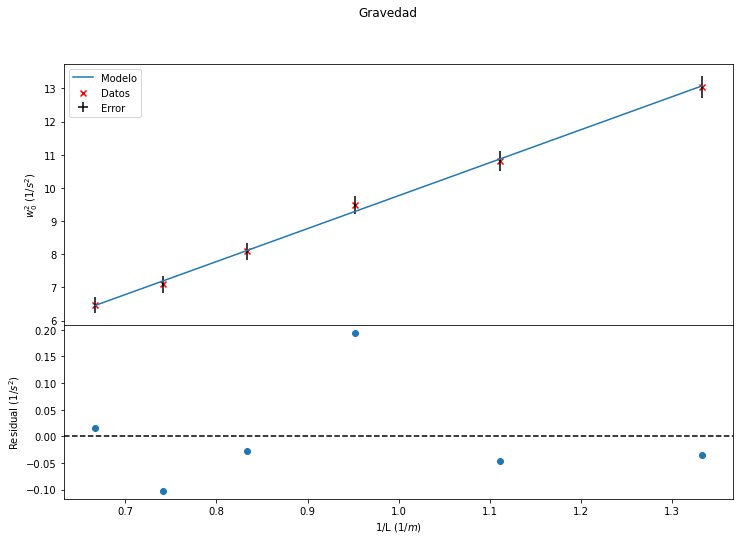

In [124]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Gravedad')
axs[0].scatter(1/l,w0**2,label='Datos',color='r',marker='x')
axs[0].errorbar(1/l,w0**2, xerr= error_x, yerr= error_y, fmt='none', ecolor='black', label= 'Error')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('$w_{0}^{2}$ (1/$s^{2}$)')
axs[0].legend()

axs[1].scatter(1/l,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('1/L (1/$m$)')
axs[1].set_ylabel('Residual (1/$s^{2}$)')
plt.show()

In [125]:
Y_ = GetModel(X,np.round(param,5))
Y_

9.92798*x - 0.16333

In [126]:
np.round(deltas,5)

array([0.20601, 0.19915])

In [127]:
Error_porcentual(g,param[1])

0.01630423172574948

In [128]:
exactitud(g,param[1],deltas[0])

c:\Users\ASUS\anaconda3\lib\site-packages\sympy\matrices\repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


Matrix([
[0.2*sigma],
[     True]])

In [129]:
presicion(deltas[0],param[1])

(0.020750332405988035, True)